In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


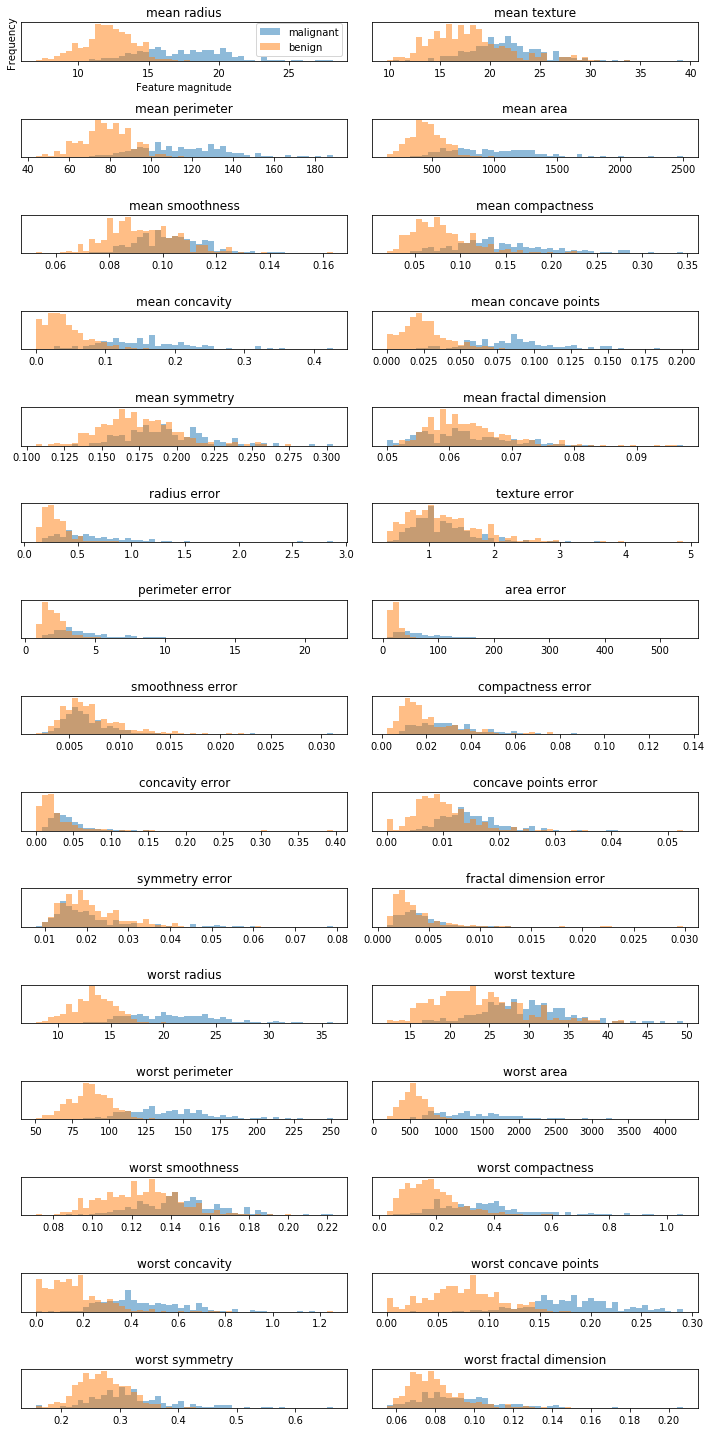

In [3]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    f, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

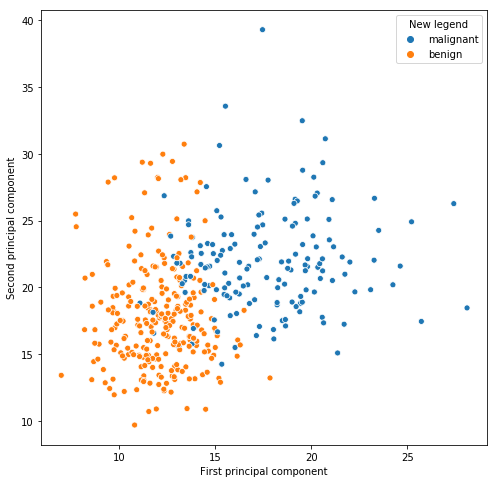

In [5]:
pipe = make_pipeline( StandardScaler(),PCA(n_components=2) )
pipe.fit(X_train)
plt.figure(figsize=(8, 8))
g=sns.scatterplot( x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
# Не хилый квест по изменению параметров, для matplotlib не решаемый в 2-3 строчки кода
leg_handles = g.get_legend_handles_labels()[0]
g.legend(leg_handles, cancer.target_names, title='New legend')

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [6]:
# Еще раз !!!! ЭТО  ВАЖНО !!!
pca = pipe.named_steps['pca']
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [7]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.22772795  0.11512543  0.23488087  0.2293683   0.13425791  0.23716002
   0.25747264  0.26083173  0.12888348  0.04447713  0.2059267   0.01450355
   0.2104806   0.20243801  0.01018676  0.16493991  0.15317587  0.17841501
   0.02461224  0.09257829  0.23290816  0.11232474  0.24080969  0.22945757
   0.12245453  0.20830303  0.22991079  0.24929196  0.11524025  0.12676328]
 [-0.21536227 -0.06016021 -0.19738608 -0.21224294  0.19371469  0.16166583
   0.06565842 -0.02406187  0.18833241  0.37787119 -0.09332359  0.10419556
  -0.08125421 -0.14040203  0.21928145  0.25189625  0.21569485  0.15331036
   0.19385443  0.3020406  -0.21035812 -0.05510384 -0.19104409 -0.20934202
   0.15696174  0.13204359  0.08625568 -0.01228249  0.10927665  0.27150952]]


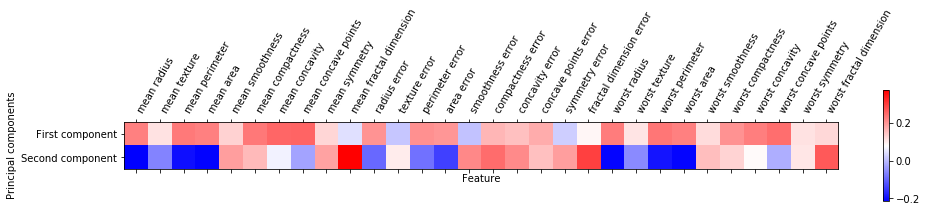

In [8]:
plt.matshow(pca.components_, cmap='bwr')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

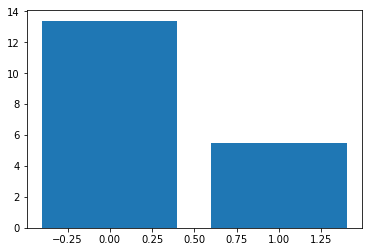

In [10]:
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_);

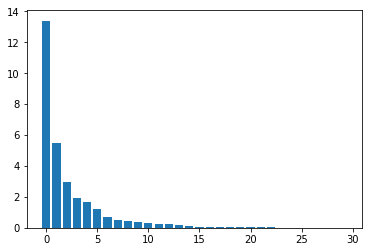

In [12]:
pipe = make_pipeline( StandardScaler(),PCA() )
pipe.fit(X_train)
########################
pca = pipe.named_steps['pca']
########################
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_);